In [2]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [6]:
# WINE-Datensatz laden
wine = load_wine()
X = wine.data
y = wine.target
X, y

(array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [9]:
# PCA durchführen
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

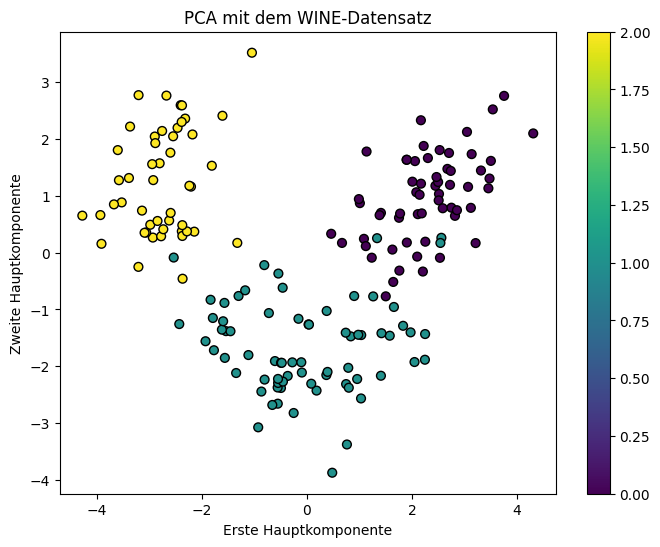

In [10]:
# Ergebnisse visualisieren
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('Erste Hauptkomponente')
plt.ylabel('Zweite Hauptkomponente')
plt.title('PCA mit dem WINE-Datensatz')
plt.colorbar()
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces

In [12]:
# YALE-Face-Datenbank laden (hier verwenden wir Olivetti Faces als Beispiel)
dataset = fetch_olivetti_faces(shuffle=True, random_state=42)
faces = dataset.data
n_samples, n_features = faces.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\domin\scikit_learn_data


In [13]:
# PCA auf Bildermatrix anwenden
n_components = 100  # Anzahl der Hauptkomponenten
pca = PCA(n_components=n_components, whiten=True)
faces_pca = pca.fit_transform(faces)

In [15]:
# Ein Bild komprimieren und rekonstruieren
face_idx = 0  # Index des zu komprimierenden Bildes
original_face = faces[face_idx]
compressed_face = pca.inverse_transform(faces_pca[face_idx])

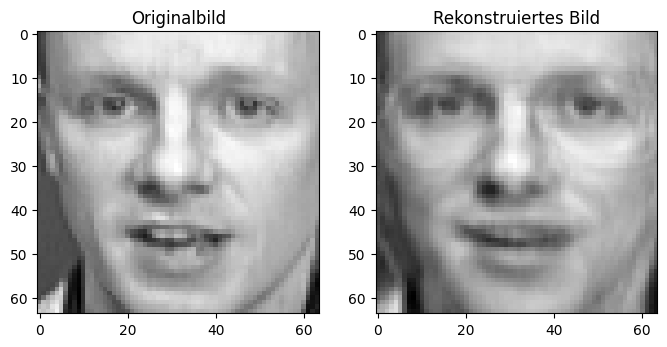

In [16]:
# Original und rekonstruierte Bilder anzeigen
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].imshow(original_face.reshape((64, 64)), cmap='gray')
ax[0].set_title('Originalbild')

ax[1].imshow(compressed_face.reshape((64, 64)), cmap='gray')
ax[1].set_title('Rekonstruiertes Bild')

plt.show()